# Generate multiple "segmentation hypotheses" for the DRIVE dataset

In this paper [Kohl, ... Ronneberger (2018) *A Probabilistic U-Net for Segmentation of Ambiguous Images*](https://arxiv.org/abs/1806.05034), the authors propose a UNet that samples from a prior distribution to generate multiple hypotheses for a segmentation. 

They have used [LIDC-IDRI dataset](https://wiki.cancerimagingarchive.net/display/Public/LIDC-IDRI) that contains annotations from multiple graders. Here, we **simulate the annotation of "multiple graders"** for the DRIVE dataset by applying changes to the default annotation.

We take the original segmentations and *remove percentage of narrowest branches*.

To accomplish this, we 
- skeletonize the image, identify branching points and label individual branches
- for each branch, we measure the length and mean width
- we remove a % of branches with smallest width

Alternatively, we can also use a simpler approach would be to remove narrow branches using *morphological opening* (see bottom). 

In [1]:
%matplotlib inline
import pylab as plt
import numpy as np
import os, sys, glob
from skimage import io, transform, util

## Get label data

In [2]:
# unzip data set
import zipfile
with zipfile.ZipFile("../data/DRIVE_retinal_image_data.zip","r") as zip_ref:
    zip_ref.extractall("../data")

In [9]:
folder_train_labels = '../data/DRIVE/test/labels/*manual1.gif'
fns_train_labels = sorted(glob.glob(folder_train_labels))
im_train_labels = np.array([io.imread(fn) / 255. for fn in fns_train_labels], np.float32)
im_train_labels.shape

(9, 584, 565)

In [10]:
import sys
sys.path.append('../data/utils')
from alternative_annotations import generate_segmentation, generate_segmentation_opening

# "Grader 2"

In [11]:
plot = False
for im, in_fn in zip(im_train_labels, fns_train_labels):
    
    dirname, fn = os.path.dirname(in_fn), os.path.basename(in_fn)
    fn, ext = os.path.splitext(fn)
    fn_out = fn.split('_')[0] + '_alternative1.gif'
    path_out = os.path.join(dirname, fn_out)
    print(path_out)
    
    im_final = generate_segmentation(im, remove_fraction=0.65)
    im_final = im_final.astype(np.uint8)*255
    print(im_final.shape, im_final.min(), im_final.max())
    
    if plot:
        fig, ax = plt.subplots(1,2,figsize=(20,10))
        cax = ax[0].imshow(im)
        ax[0].set_title('Original')
        cax = ax[1].imshow(im_final)
        ax[1].set_title('Small branches removed')
        for a in ax: a.axis('off')
        plt.show()
        plt.close()
            
    from skimage import io
    io.imsave(path_out, im_final)

../data/DRIVE/test/labels/01_alternative1.gif
(584, 565) 0 255
../data/DRIVE/test/labels/02_alternative1.gif
(584, 565) 0 255
../data/DRIVE/test/labels/03_alternative1.gif
(584, 565) 0 255
../data/DRIVE/test/labels/04_alternative1.gif
(584, 565) 0 255
../data/DRIVE/test/labels/05_alternative1.gif
(584, 565) 0 255
../data/DRIVE/test/labels/06_alternative1.gif
(584, 565) 0 255
../data/DRIVE/test/labels/07_alternative1.gif
(584, 565) 0 255
../data/DRIVE/test/labels/08_alternative1.gif
(584, 565) 0 255
../data/DRIVE/test/labels/09_alternative1.gif
(584, 565) 0 255


# "Grader 3"

In [12]:
plot = False
for im, in_fn in zip(im_train_labels, fns_train_labels):
    
    dirname, fn = os.path.dirname(in_fn), os.path.basename(in_fn)
    fn, ext = os.path.splitext(fn)
    fn_out = fn.split('_')[0] + '_alternative2.gif'
    path_out = os.path.join(dirname, fn_out)
    print(path_out)
    
    im_final = generate_segmentation_opening(im, disk_size=1)
    im_final = im_final.astype(np.uint8)*255
    print(im_final.shape, im_final.min(), im_final.max())
    
    if plot:
        fig, ax = plt.subplots(1,2,figsize=(20,10))
        cax = ax[0].imshow(im)
        ax[0].set_title('Original')
        cax = ax[1].imshow(im_final)
        ax[1].set_title('Small branches removed')
        for a in ax: a.axis('off')
        plt.show()
        plt.close()
            
    from skimage import io
    io.imsave(path_out, im_final)

../data/DRIVE/test/labels/01_alternative2.gif
(584, 565) 0 255
../data/DRIVE/test/labels/02_alternative2.gif
(584, 565) 0 255
../data/DRIVE/test/labels/03_alternative2.gif
(584, 565) 0 255
../data/DRIVE/test/labels/04_alternative2.gif
(584, 565) 0 255
../data/DRIVE/test/labels/05_alternative2.gif
(584, 565) 0 255
../data/DRIVE/test/labels/06_alternative2.gif
(584, 565) 0 255
../data/DRIVE/test/labels/07_alternative2.gif
(584, 565) 0 255
../data/DRIVE/test/labels/08_alternative2.gif
(584, 565) 0 255
../data/DRIVE/test/labels/09_alternative2.gif
(584, 565) 0 255


-----

-----

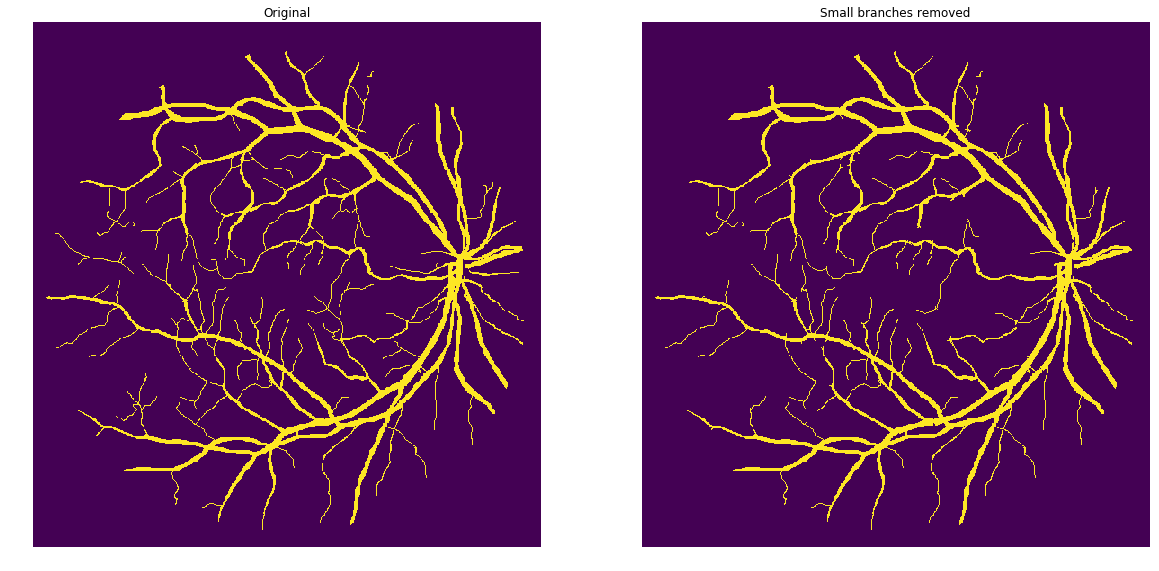

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

cax = ax[0].imshow(im)
ax[0].set_title('Original')
cax = ax[1].imshow(im_final)
ax[1].set_title('Small branches removed')
for a in ax: a.axis('off')

In [15]:
plotsize=(10,10)

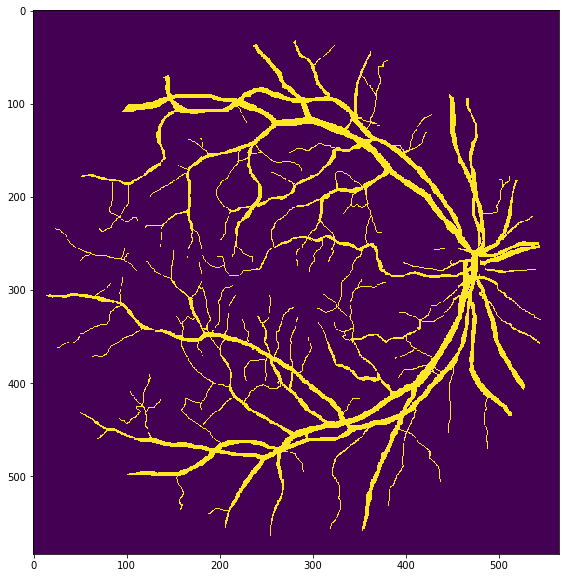

In [143]:
im = im_train_labels[0]
fig, ax = plt.subplots(1,1,figsize=plotsize)
plt.imshow(im)#[200:300,200:300])

### Skeletonize

(584, 565)


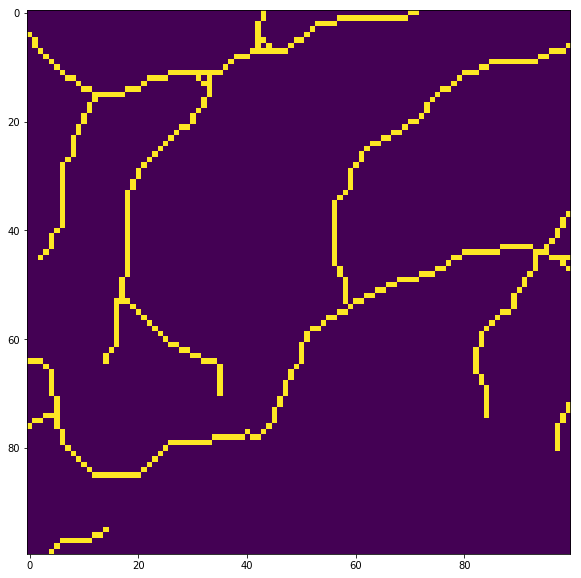

In [17]:
from skimage.morphology import skeletonize, medial_axis
im_skel = skeletonize(im)

print(im_skel.shape)
fig, ax = plt.subplots(1,1,figsize=plotsize)
plt.imshow(im_skel[200:300,200:300])

### Count neighbors 

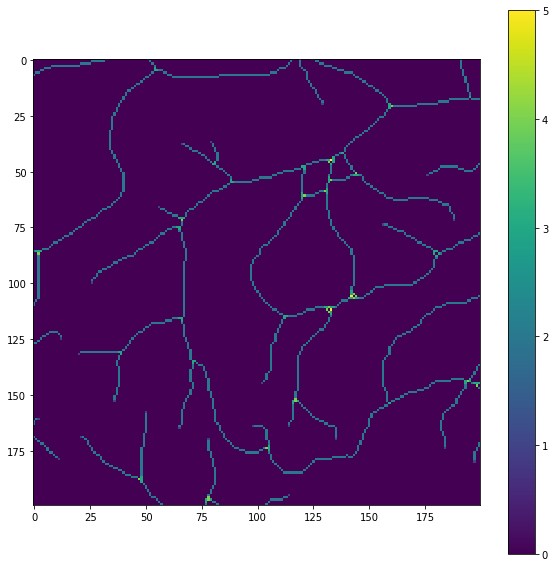

In [29]:
from scipy.ndimage.filters import convolve
kernel1 = np.array([[0,1,0],
                    [1,0,1],
                    [0,1,0]])
im_nbs = convolve(im_skel.astype(np.int), kernel1, mode='constant')
kernel2 = np.array([[1,0,1],
                    [0,0,0],
                    [1,0,1]])
im_nbs += convolve(im_skel.astype(np.int), kernel2, mode='constant')

im_nbs *= im_skel
fig, ax = plt.subplots(1,1,figsize=(10,10))
cax = ax.imshow(im_nbs[100:300,100:300])
plt.colorbar(cax, ax=ax)

### Get only branching points

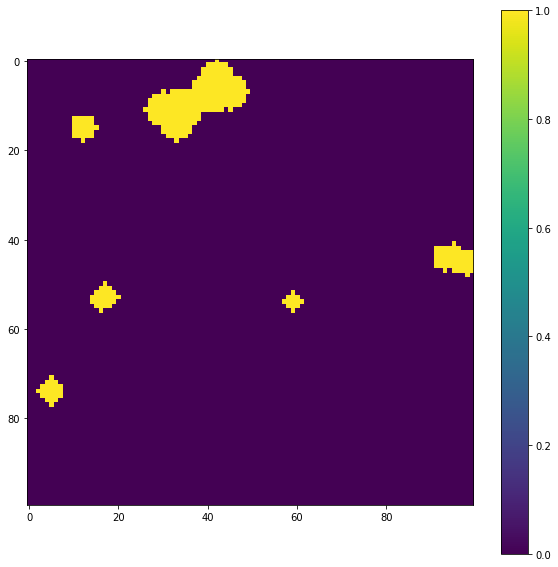

In [32]:
# get the points with 3 or more neighbors
im_branch_points = np.zeros_like(im_nbs)
im_branch_points[ im_nbs >= 3 ] = 1

# get local width of structure
from scipy.ndimage.morphology import distance_transform_edt
im_widths = distance_transform_edt(im)

# draw branching points with diameter = width of structure
from skimage.draw import circle
bps = np.array(np.where(im_branch_points == 1)).T
im_bps = np.zeros_like(im)
for bp in bps:
    x, y = bp
    radius = im_widths[x,y] * 2.0 + 0.1
    r,c = circle(x, y, radius)
    im_bps[r,c] = 1

fig, ax = plt.subplots(1,1,figsize=(10,10))
cax = ax.imshow(im_bps[200:300,200:300])
plt.colorbar(cax, ax=ax)

# Plot original structure with branching points

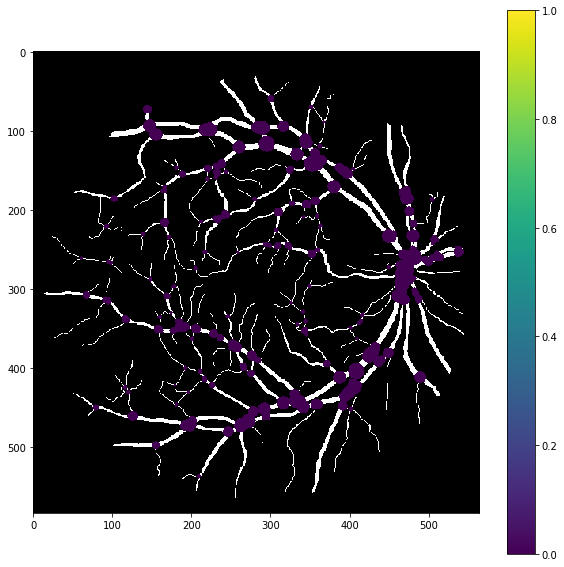

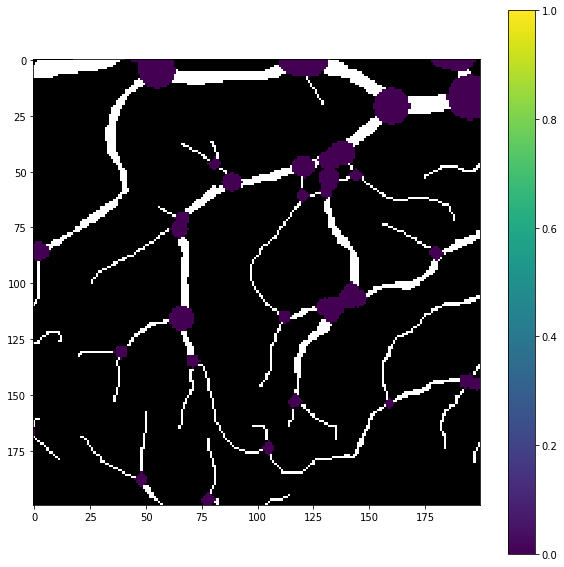

In [33]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(im, cmap='gray')
ax.imshow(np.ma.masked_where(im_bps == 0, im_bps), cmap='viridis')
plt.colorbar(cax, ax=ax)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(im[100:300,100:300], cmap='gray')
ax.imshow(np.ma.masked_where(im_bps == 0, im_bps)[100:300,100:300], cmap='viridis')
plt.colorbar(cax, ax=ax)
plt.show()


### Label individual branches

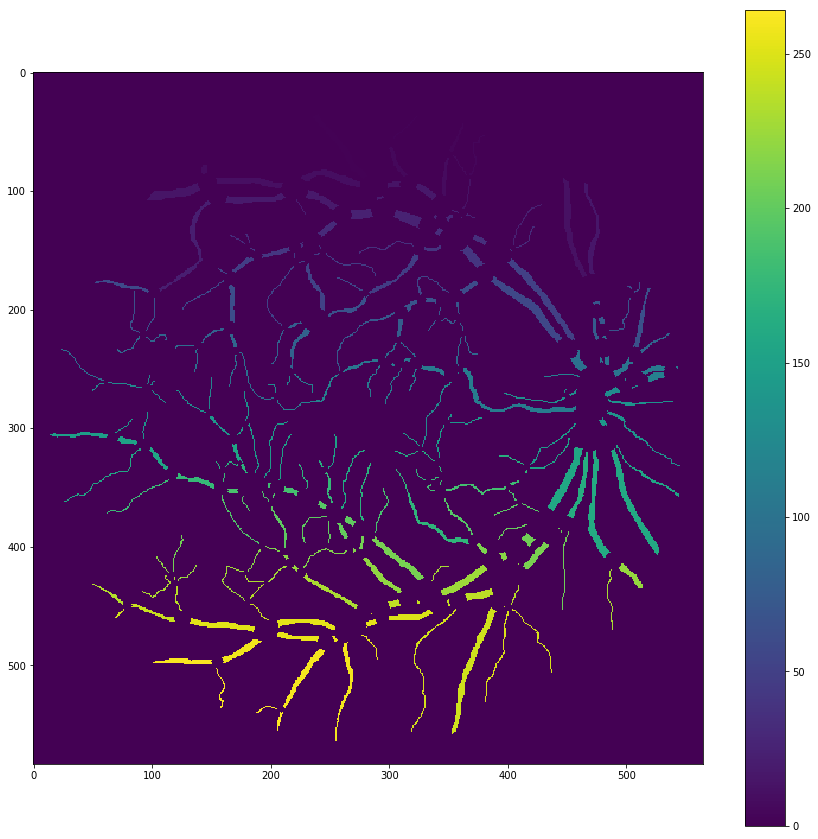

In [34]:
from skimage.morphology import label

# subtract branching points from structure 
# to isolate individual branches
im_branches = np.clip(im-im_bps, a_min=0, a_max=1)

im_label = label(im_branches, neighbors=8)

fig, ax = plt.subplots(1,1,figsize=(15,15))
cax = ax.imshow(im_label)#[200:300,200:300])
plt.colorbar(cax, ax=ax)

## Stats on branches

In [35]:
print('Number of unique branches: ', len(np.unique(im_label))-1)


Number of unique branches:  264


In [36]:
np.unique(im_label)[1:]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

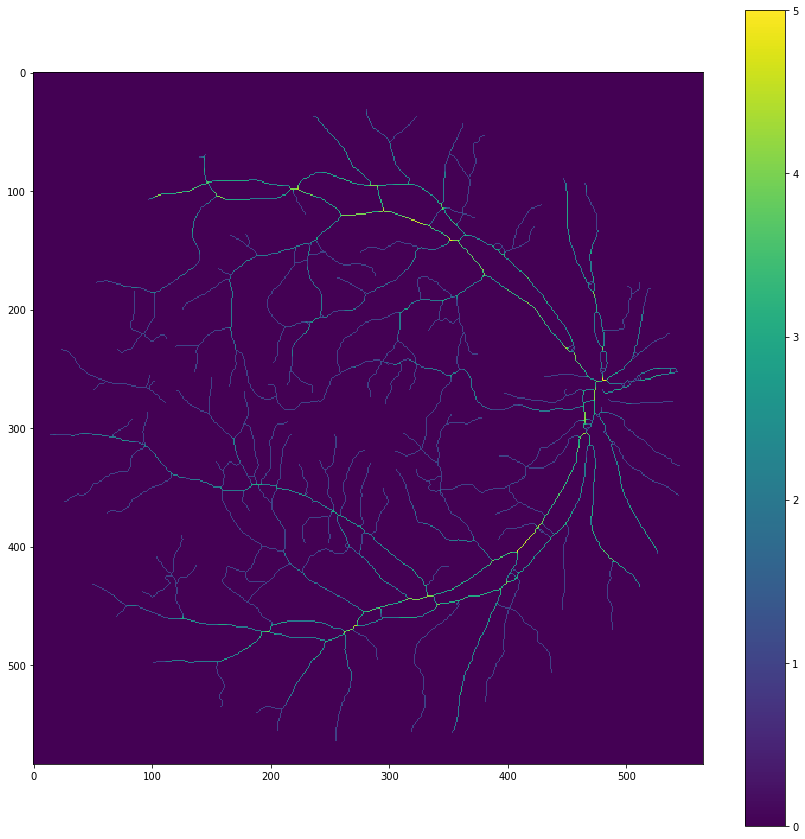

In [37]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
cax = ax.imshow(im_widths * im_skel)#[200:300,200:300])
plt.colorbar(cax, ax=ax)

In [49]:
branch_labels = np.unique(im_label)[1:]

widths, lengths = [], []

for label in branch_labels:
    
    coords_branch = np.array(np.where(im_label == label)).T
    x, y  = coords_branch[:,0], coords_branch[:,1]

    # get length of branch: number of point on skeleton 
    length = np.sum(im_skel[x,y])
    
    # get average width: width at skeleton points, divided by length
    width = np.sum(2.0*im_widths[x,y] * im_skel[x,y]) / (length+1.0)
    
    print('branch {: >3d}: length = {: >5d}, width = {: >6.04f}'.format(label, length, width))
    
    branch = {}
    widths.append( width )
    lengths.append( length )

branch   1: length =    27, width = 2.7591
branch   2: length =    56, width = 4.6413
branch   3: length =    22, width = 1.9130
branch   4: length =    23, width = 2.3250
branch   5: length =    38, width = 1.9487
branch   6: length =    24, width = 3.6435
branch   7: length =    17, width = 1.8889
branch   8: length =    32, width = 3.2017
branch   9: length =     8, width = 4.2509
branch  10: length =    48, width = 5.3154
branch  11: length =    55, width = 5.3457
branch  12: length =    84, width = 4.8300
branch  13: length =    25, width = 1.9231
branch  14: length =    10, width = 4.5572
branch  15: length =    43, width = 6.2833
branch  16: length =    77, width = 3.1985
branch  17: length =    15, width = 5.0517
branch  18: length =    23, width = 5.5225
branch  19: length =    48, width = 4.8650
branch  20: length =     2, width = 4.0000
branch  21: length =    13, width = 1.8571
branch  22: length =    86, width = 3.3294
branch  23: length =    40, width = 1.9512
branch  24:

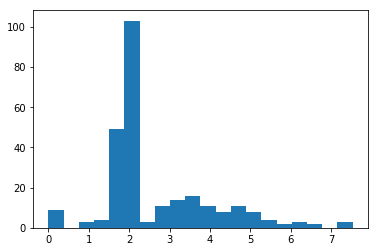

In [50]:
_ = plt.hist(widths, bins=20)

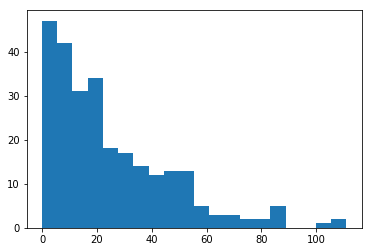

In [51]:
_ = plt.hist(lengths, bins=20)

### Remove narrowest branches

In [75]:
# sort branches according to their width
widths = np.array(widths)
ind = np.argsort( widths )
# get narrowest 65% 
narrow_branches = branch_labels[ind][:int(len(widths) * 0.65)]

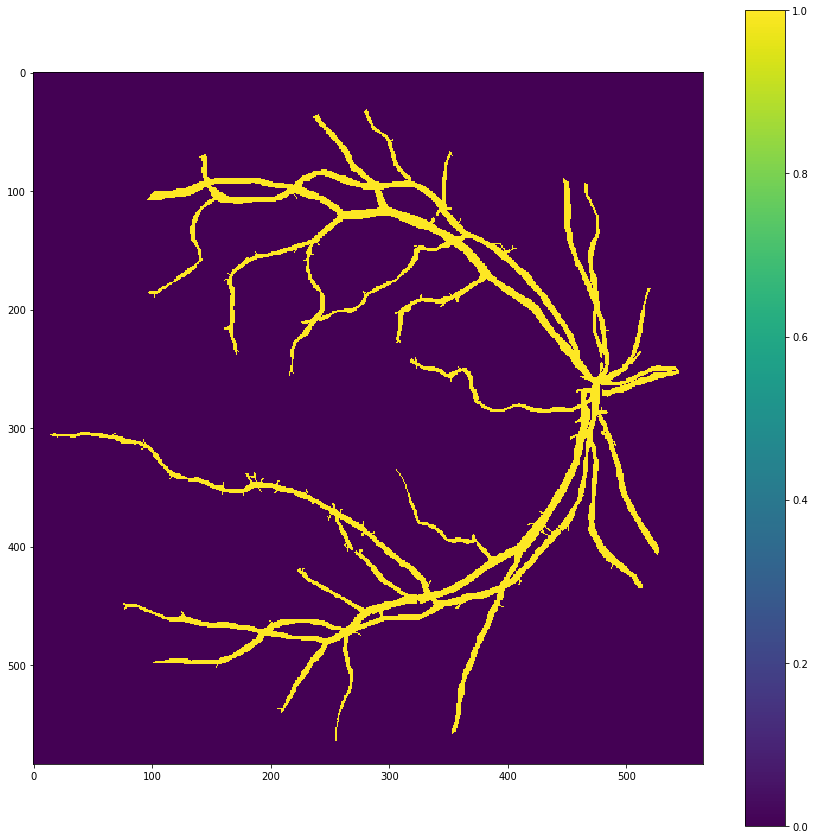

In [157]:
# remove narrowest branches 
im_removed = im.copy()
for narrow_branch in narrow_branches:
    im_removed[ im_label == narrow_branch ] = 0
    
# remove small remaining objects 
from skimage.morphology import remove_small_objects
im_removed = im_removed.astype(np.bool)
im_removed_clean = remove_small_objects(im_removed, min_size=150, connectivity=2, in_place=False)

# perform opening to remove remaining small narrow branches
#from skimage.morphology import white_tophat, disk
#im_removed = im_removed.astype(np.bool)
#im_removed_clean = np.any(im_removed_clean and not white_tophat(im_removed_clean, disk(2)))

fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(np.ma.masked_where(im == 0, im), cmap='gray')
cax = ax.imshow(np.ma.masked_where(im_removed == 0, im_label), cmap='bwr')
cax = ax.imshow(im_removed_clean.astype(np.float32))
plt.colorbar(cax, ax=ax)

im_final = im_removed_clean

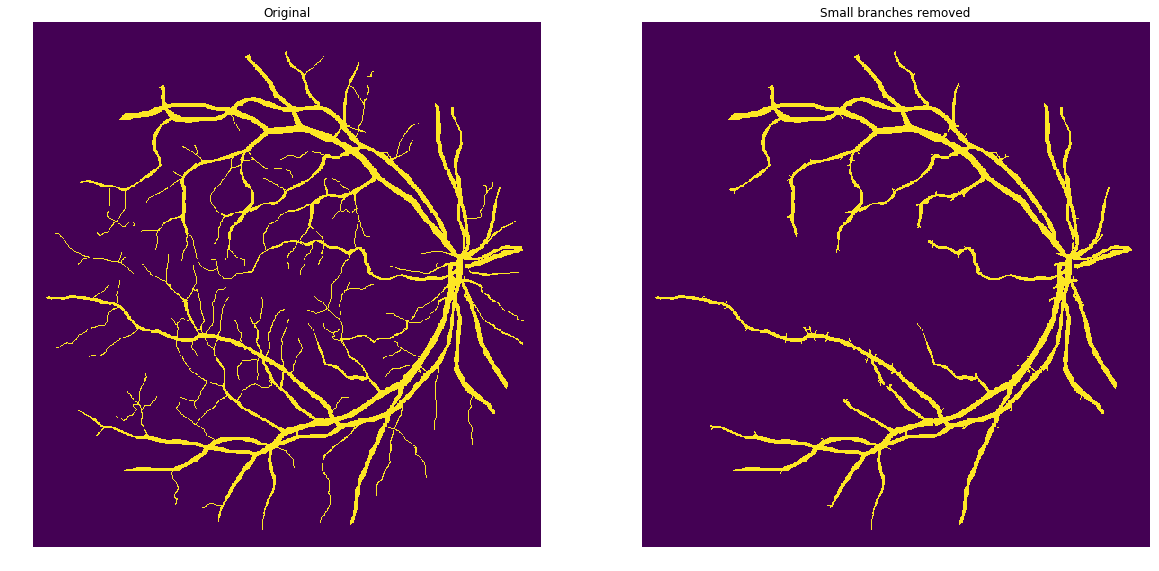

In [158]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

cax = ax[0].imshow(im)
ax[0].set_title('Original')
cax = ax[1].imshow(im_final)
ax[1].set_title('Small branches removed')
for a in ax: a.axis('off')

# Alternatively, remove tiny branches performing morphological opening

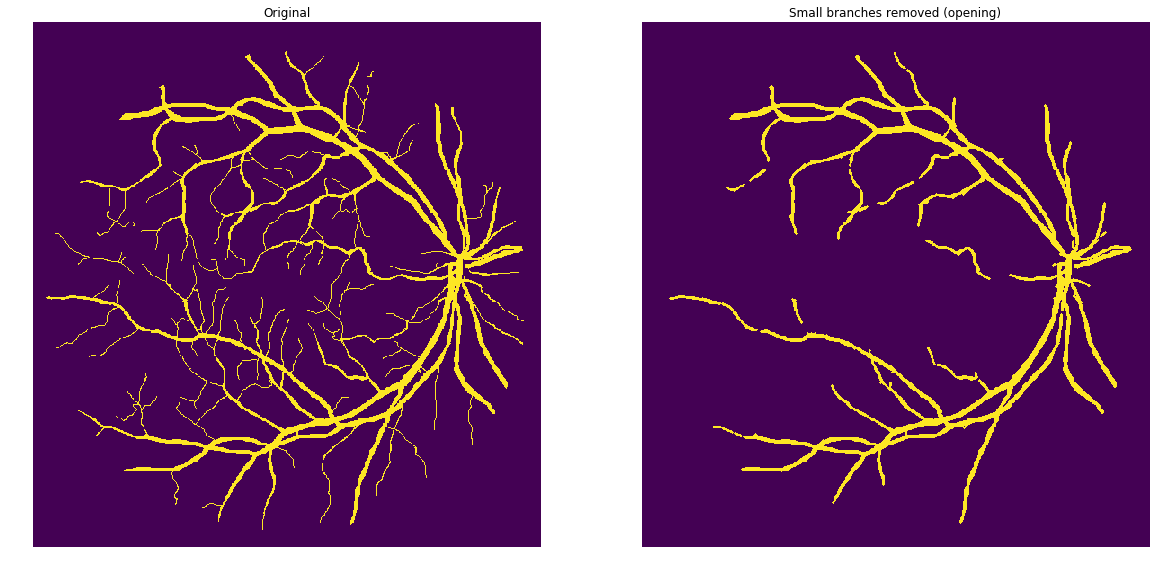

In [162]:
# perform opening to remove remaining small narrow branches
from skimage.morphology import opening, disk
im_opening = opening(im.astype(np.int), disk(1))

# remove small remaining objects 
from skimage.morphology import remove_small_objects
im_opening_clean = remove_small_objects(im_opening.astype(np.bool), min_size=50, connectivity=2, in_place=False)

fig, ax = plt.subplots(1,2,figsize=(20,10))
cax = ax[0].imshow(im)
ax[0].set_title('Original')
cax = ax[1].imshow(im_opening_clean)
ax[1].set_title('Small branches removed (opening)')
for a in ax: a.axis('off')